In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

g = 9.81  # Acceleration due to gravity in m/s^2

def max_drop(L0, k, m):
    """
    Calculate the maximum drop
    
    Parameters:
    L0 (float): Natural length of the cord
    k (float): elasticity constant of the cord in N/m.
    m (float): Mass in kg.
    
    Returns:
    float: Maximum drop
    """
    q = k / m
    return g*(1 + np.sqrt(1+2*q*L0/g)) / q + L0

def velocity(y, L0, k, m):
    """
    Calculate the velocity at drop y.
    
    Parameters:
    L0 (float): Natural length of the cord
    k (float): elasticity constant of the cord in N/m.
    m (float): Mass in kg.
    
    Returns:
    float: Velocity at drop y
    """
    tol = 1e-10  # Tolerance for floating point comparison

    if y < L0:
        return np.sqrt(2*g*y)
    else:
        # Check if the value inside the square root is negative
        sqrt_part = 2*g*y - k/m * (y - L0)**2
        if sqrt_part < 0:
            if np.abs(sqrt_part) < tol:
                # If the value is significantly negative, raise an error
                return 0
            else:
                raise ValueError(f"Negative value inside sqrt: {sqrt_part}, y={y}, L0={L0}, k={k}, m={m}")
        return np.sqrt(sqrt_part)

def accel(y, L0, k, m):
    """
    Calculate the acceleration at drop y.
    
    Parameters:
    L0 (float): Natural length of the cord
    k (float): elasticity constant of the cord in N/m.
    m (float): Mass in kg.
    
    Returns:
    float: Acceleration at drop y
    """
    if y < L0:
        return g
    else:
        return g - k/m * (y - L0)


Maximum drop: 175.52 m
Free fall time to maximum drop: 5.98 s


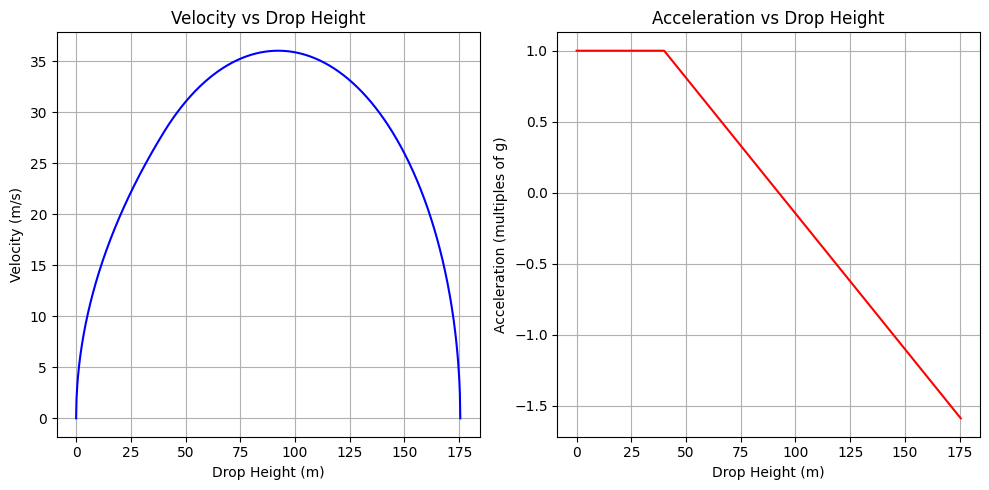

In [74]:
k = 15 # elasticity constant in N/m
m = 80 # mass in kg
L0 = 40  # natural length of the cord in m

Lm = max_drop(L0, k, m)
print(f"Maximum drop: {Lm:.2f} m")
tm_free = np.sqrt(2*Lm/g)
print(f"Free fall time to maximum drop: {tm_free:.2f} s")

# Create a range of drop heights
y_values = np.linspace(0, Lm, 1000)

# Calculate velocity and acceleration for each drop height
velocity_values = [velocity(y, L0, k, m) for y in y_values]
acceleration_values = [accel(y, L0, k, m)/g for y in y_values]

# Plot velocity and acceleration in two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Velocity subplot
axs[0].plot(y_values, velocity_values, label='Velocity (m/s)', color='blue')
axs[0].set_xlabel('Drop Height (m)')
axs[0].set_ylabel('Velocity (m/s)')
axs[0].set_title('Velocity vs Drop Height')
#axs[0].legend()
axs[0].grid(True)

# Acceleration subplot
axs[1].plot(y_values, acceleration_values, label='Acceleration (m/s²)', color='red')
axs[1].set_xlabel('Drop Height (m)')
axs[1].set_ylabel('Acceleration (multiples of g)')
axs[1].set_title('Acceleration vs Drop Height')
#axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [62]:
avg_velocity = np.array([(velocity_values[i] + velocity_values[i + 1]) / 2 for i in range(len(velocity_values) - 1)])
d =  np.diff(y_values)
dt = d / avg_velocity

time_dropped = np.insert(np.cumsum(dt), 0, 0)


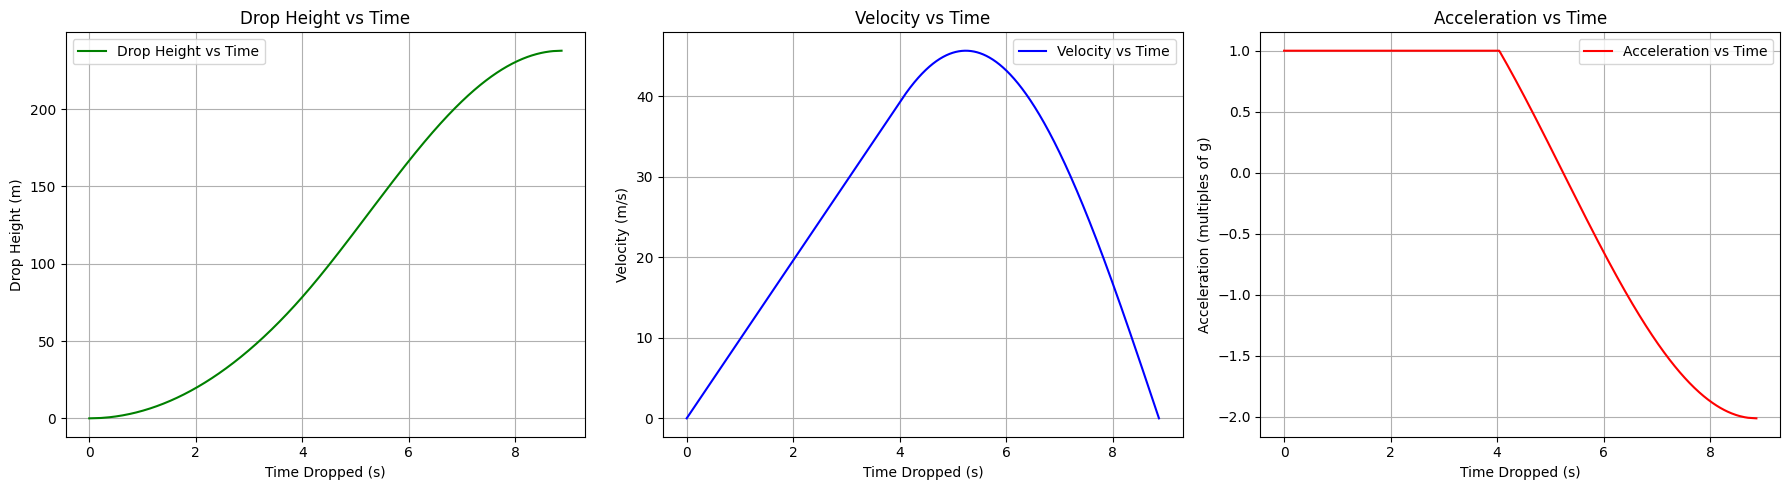

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Drop Height vs Time subplot
axs[0].plot(time_dropped, y_values, label='Drop Height vs Time', color='green')
axs[0].set_xlabel('Time Dropped (s)')
axs[0].set_ylabel('Drop Height (m)')
axs[0].set_title('Drop Height vs Time')
axs[0].grid(True)
axs[0].legend()

# Velocity vs Time subplot
axs[1].plot(time_dropped, velocity_values, label='Velocity vs Time', color='blue')
axs[1].set_xlabel('Time Dropped (s)')
axs[1].set_ylabel('Velocity (m/s)')
axs[1].set_title('Velocity vs Time')
axs[1].grid(True)
axs[1].legend()

# Acceleration vs Time subplot
axs[2].plot(time_dropped, acceleration_values, label='Acceleration vs Time', color='red')
axs[2].set_xlabel('Time Dropped (s)')
axs[2].set_ylabel('Acceleration (multiples of g)')
axs[2].set_title('Acceleration vs Time')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

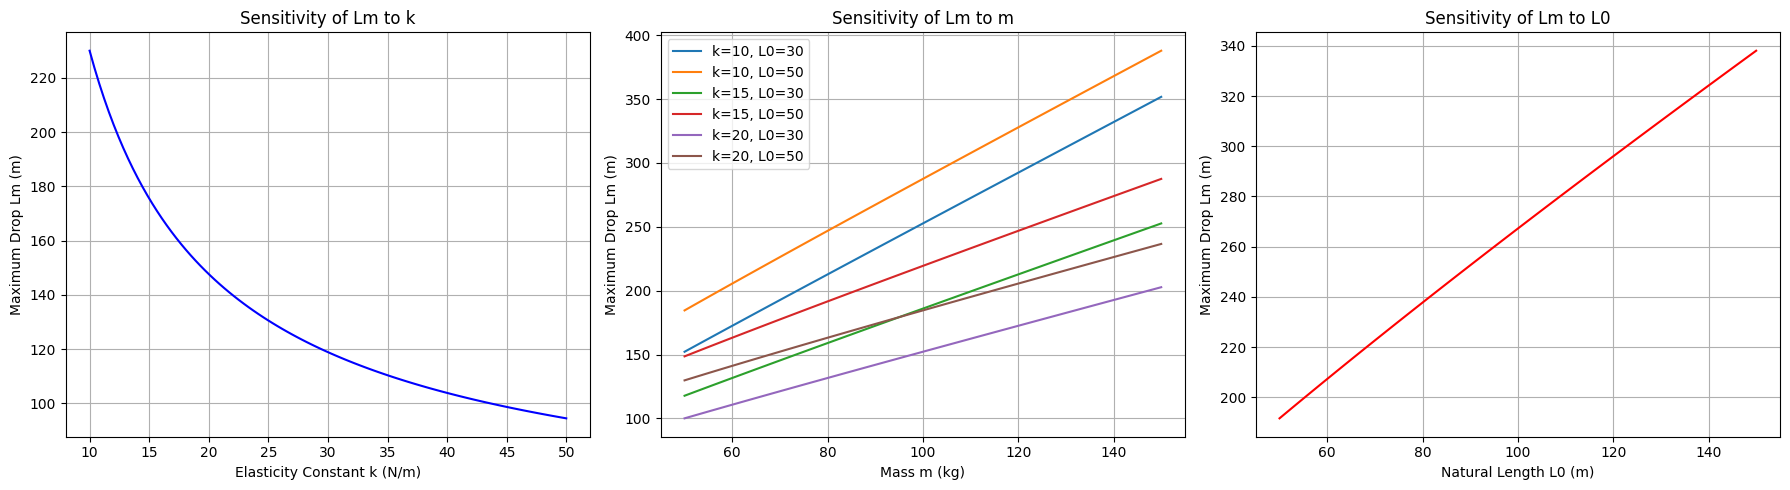

In [73]:
k = 15 # elasticity constant in N/m
m = 80 # mass in kg
L0 = 40  # natural length of the cord in m

Lm = max_drop(L0, k, m)

# Sensitivity analysis for Lm
k_values = [10, 15, 20]  # Fixed k values
L0_values = [30, 50]  # Fixed L0 values

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Sensitivity to k
Lm_k = [max_drop(L0, k, m) for k in np.linspace(10, 50, 100)]  # Sensitivity to k
axs[0].plot(np.linspace(10, 50, 100), Lm_k, label='Sensitivity to k', color='blue')
axs[0].set_xlabel('Elasticity Constant k (N/m)')
axs[0].set_ylabel('Maximum Drop Lm (m)')
axs[0].set_title('Sensitivity of Lm to k')
axs[0].grid(True)

# Sensitivity to m with multiple lines for different k and L0 values
for k in k_values:
    for L0 in L0_values:
        Lm_m = [max_drop(L0, k, m_val) for m_val in m_values]
        axs[1].plot(m_values, Lm_m, label=f'k={k}, L0={L0}')
axs[1].set_xlabel('Mass m (kg)')
axs[1].set_ylabel('Maximum Drop Lm (m)')
axs[1].set_title('Sensitivity of Lm to m')
axs[1].grid(True)
axs[1].legend()

# Sensitivity to L0
Lm_L0 = [max_drop(L0, 15, m) for L0 in np.linspace(50, 150, 100)]  # Sensitivity to L0
axs[2].plot(np.linspace(50, 150, 100), Lm_L0, label='Sensitivity to L0', color='red')
axs[2].set_xlabel('Natural Length L0 (m)')
axs[2].set_ylabel('Maximum Drop Lm (m)')
axs[2].set_title('Sensitivity of Lm to L0')
axs[2].grid(True)

plt.tight_layout()
plt.show()

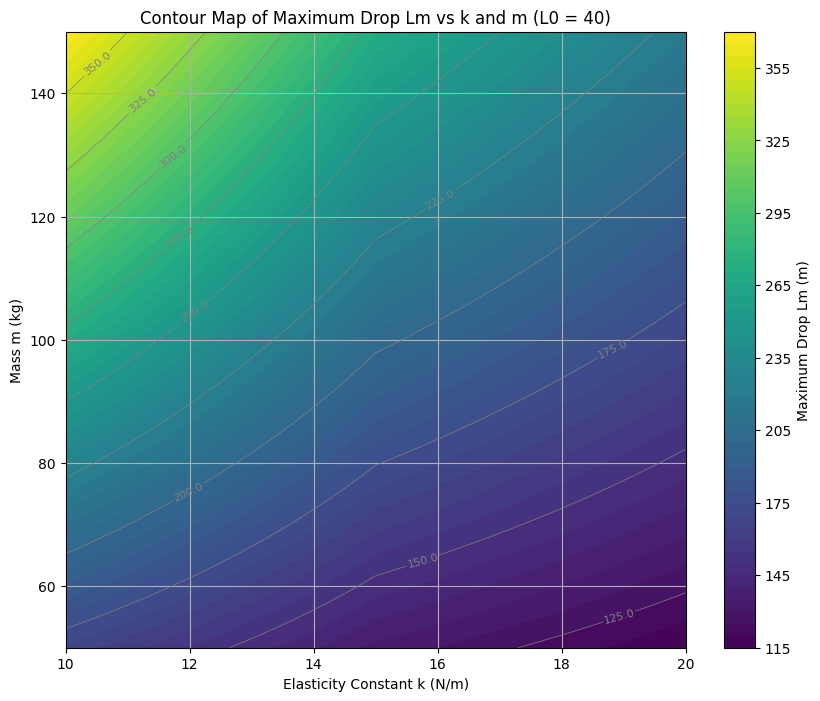

In [72]:
L0_fixed = 40

# Generate a grid of k and m values
k_grid, m_grid = np.meshgrid(k_values, m_values)

# Calculate Lm for each combination of k and m
Lm_grid = np.array([[max_drop(L0_fixed, k, m) for k in k_values] for m in m_values])

# Plot the contour map
plt.figure(figsize=(10, 8))
contour = plt.contourf(k_grid, m_grid, Lm_grid, levels=50, cmap='viridis')
contour_lines = plt.contour(k_grid, m_grid, Lm_grid, levels=10, colors='gray', linewidths=0.5)
plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")
plt.colorbar(contour, label='Maximum Drop Lm (m)')
plt.xlabel('Elasticity Constant k (N/m)')
plt.ylabel('Mass m (kg)')
plt.title(f'Contour Map of Maximum Drop Lm vs k and m (L0 = {L0_fixed})')
plt.grid(True)
plt.show()

In [ ]:
k = 15 # elasticity constant in N/m
m = 80 # mass in kg
L0 = 80  # natural length of the cord in m

Lm = max_drop(L0, k, m)

# Sensitivity analysis for Lm
k_values = np.linspace(10, 50, 100)  # Varying k
m_values = np.linspace(50, 150, 100)  # Varying m
L0_values = np.linspace(50, 150, 100)  # Varying L0

Lm_k = [max_drop(L0, k, m) for k in k_values]  # Sensitivity to k
Lm_m = [max_drop(L0, k, m) for m in m_values]  # Sensitivity to m
Lm_L0 = [max_drop(L0, k, m) for L0 in L0_values]  # Sensitivity to L0

# Plot sensitivity analysis
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Sensitivity to k
axs[0].plot(k_values, Lm_k, label='Sensitivity to k', color='blue')
axs[0].set_xlabel('Elasticity Constant k (N/m)')
axs[0].set_ylabel('Maximum Drop Lm (m)')
axs[0].set_title('Sensitivity of Lm to k')
axs[0].grid(True)

# Sensitivity to m
axs[1].plot(m_values, Lm_m, label='Sensitivity to m', color='green')
axs[1].set_xlabel('Mass m (kg)')
axs[1].set_ylabel('Maximum Drop Lm (m)')
axs[1].set_title('Sensitivity of Lm to m')
axs[1].grid(True)

# Sensitivity to L0
axs[2].plot(L0_values, Lm_L0, label='Sensitivity to L0', color='red')
axs[2].set_xlabel('Natural Length L0 (m)')
axs[2].set_ylabel('Maximum Drop Lm (m)')
axs[2].set_title('Sensitivity of Lm to L0')
axs[2].grid(True)

plt.tight_layout()
plt.show()